## Ordinary Least Squares

This is an ipython notebook to illustrate ordinary least squares using energy data from University of Chicago buildings. We attempt to find the relationship between energy use and other parameters (in this case, temperature) using this method. 

### Principle behind least squares

To find the relationship between Energy Use (E) and temperature (T), let's assume that it has the form, 

$$E = kT$$

Our goal is to find k, given E and T. 

### Dataset
Our dataset consists of 2 csv files. The files can be downloaded here:
https://rdcep.squarespace.com/caal-activities/fall-hackathon-2016

Click on ***comed data*** for energy usage data and ***weather*** for temperature data.

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Files

In [2]:
df = pd.read_csv('uc_comed_two_years_final.csv', header = 'infer')
df.columns

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'METER_ID', u'DATETIME', u'TERM', u'BD_ID', u'CLON', u'CLAT',
       u'DISCRIPT1', u'USAGE', u'SQFT', u'GROUP_ID', u'GROUP_NAME',
       u'LINKED_METERS'],
      dtype='object')

In [3]:
df_temp = pd.read_csv('weather_prepared_final.csv')
df_temp.columns

Index([u'DATE', u'STATION', u'TEMPERATURE', u'HUMIDITY', u'LON', u'LAT'], dtype='object')

### Keeping useful columns and converting date-time

In [4]:
df_new = df.filter(['DATETIME', 'TERM', 'BD_ID', 'DISCRIPT1', 'USAGE'])
df_new['DATETIME'] = pd.to_datetime(df_new['DATETIME'])
df_temp_new = df_temp.filter(['DATE', 'STATION', 'TEMPERATURE', 'HUMIDITY'])
df_temp_new['DATE'] = pd.to_datetime(df_temp_new['DATE'])

### Function to pick data

In [5]:
def get_data(term, building_name, weather_station = 'Regenstein Library Weather Station'):
    ## PICK USAGE DATA BASED ON TERM AND BUILDING_NAME
    usage = df_new[(df_new['TERM'] == term) & (df_new['DISCRIPT1'] == building_name)]
    
    ## GET START AND END DATE OF THE TERM
    start_date = usage.iloc[0]['DATETIME']
    end_date = usage.iloc[-1]['DATETIME']
    
    ## PICK WEATHER STATION FOR TEMP
    df_T = df_temp_new[(df_temp_new['STATION'] == weather_station)]
    
    df_bool1 = (df_temp_new['DATE'] == start_date)
    index1 = df_bool1[df_bool1 == True].index.tolist()[0]
    
    df_bool2 = (df_temp_new['DATE'] == end_date)
    index2 = df_bool2[df_bool2 == True].index.tolist()[0]
    
    try: 
        temp = df_T.loc[index1:index2+1] 
    except:
        temp = df_T.loc[index1:end]
    
    usage_temp = pd.merge(left = usage, right = temp, left_on='DATETIME', right_on = 'DATE', how='left')
    return(usage_temp)

#### values for term, building_name, weather_station below

In [6]:
terms = df_new.TERM.unique()
terms

array(['Winter 2014', nan, 'Spring 2014', 'Summer 2014', 'Autumn 2014',
       'Winter 2015', 'Spring 2015', 'Summer 2015', 'Autumn 2015',
       'Winter 2016'], dtype=object)

In [7]:
building_names = df_new.DISCRIPT1.unique()
building_names

array(['Bernard Mitchell Hospitial', 'John Crerar Library',
       'Steam Plant Power Plant', 'Chapin Hall',
       'Social Science Research Building',
       'Duchossois Center for Advanced Medicine', 'Harris School',
       'Kovler Laboratories', 'Hinds Laboratory',
       'American School Building', 'Cummings Life Sciences Center',
       'Bookstore', 'Laird Bell Law Quadrangle',
       'A.J. Carlson Animal Research Facility', 'Henry Crown Field House',
       'Breckinridge House', 'Chicago Lying-In Hospital',
       'Surgery Brain Research Institude', 'Campus Student Center',
       'Residential', 'Alber Merrit Billings Hospital',
       "Sylvan & Arma Wyler Children's Hospital", 'Walker Museum',
       'Woodlawn Social Service Center', 'Peck Pavilion', 'Pick Hall',
       'University Service Building (ATS)', 'Stagg Field Building',
       'Eckhart Hall', 'Ellis Avenue Parking Strucutre', 'Levi Hall',
       'BSDLC', 'Charles M. Harper Center', 'Stuart Hall', 'Anatomy',
       'New

In [8]:
weather_stations = df_temp_new.STATION.unique()
weather_stations

array(['Bell Weather Station', 'Regenstein Library Weather Station'], dtype=object)

### Select TERM, BUILDING_NAME & Get Dataframe

In [9]:
usage_temp = get_data('Summer 2015', 'Regenstein Library', 'Regenstein Library Weather Station')
usage_temp.columns

Index([u'DATETIME', u'TERM', u'BD_ID', u'DISCRIPT1', u'USAGE', u'DATE',
       u'STATION', u'TEMPERATURE', u'HUMIDITY'],
      dtype='object')

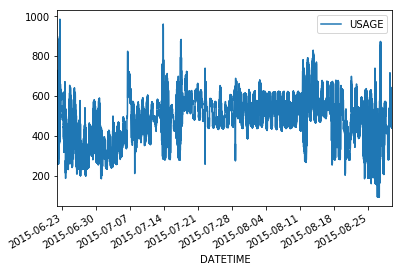

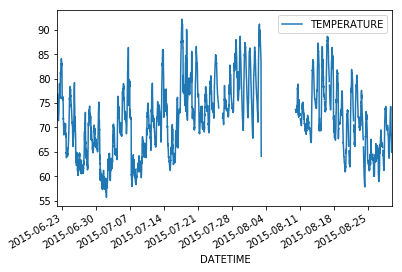

In [10]:
usage_temp.plot(x = 'DATETIME', y = 'USAGE')
usage_temp.plot(x = 'DATETIME', y = 'TEMPERATURE')

In [11]:
import statsmodels.formula.api as sm
usage_temp = usage_temp.dropna(subset = ['TEMPERATURE'])
model = sm.ols(formula='USAGE ~ TEMPERATURE', data=usage_temp)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  USAGE   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     2225.
Date:                Tue, 25 Apr 2017   Prob (F-statistic):               0.00
Time:                        10:22:54   Log-Likelihood:                -35767.
No. Observations:                5842   AIC:                         7.154e+04
Df Residuals:                    5840   BIC:                         7.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -195.9364     14.384    -13.622      0.000    -224.135    -167.738
TEMPERATURE     9.4064      0.199     47.171      0.000       9.016       9.797
==============================================================================
Omnibus:                       19.702   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.116
Skew:                          -0.036   Prob(JB):                     3.52e-06
Kurtosis:                       3.313   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

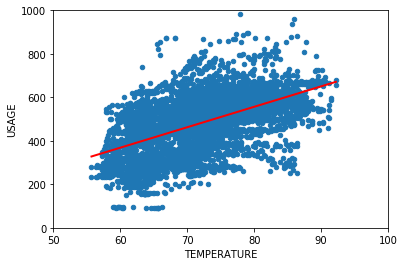

In [12]:
X_new = pd.DataFrame({'TEMPERATURE': [usage_temp.TEMPERATURE.min(), usage_temp.TEMPERATURE.max()]})
preds = result.predict(X_new)
usage_temp.plot(x = 'TEMPERATURE', y = 'USAGE', kind='scatter', ylim = [0, 1000], xlim = [50,100])
plt.plot(X_new, preds, c='red', linewidth=2)